# Titanic Disaster

## Import

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

%matplotlib inline

## Process Data

In [103]:
def extract_surname(name):
    return name.split(',')[0]
    
def isMaster(name):
    if 'Master' in name:
        return 1
    else:
        return 0
    
def process_data (data):
    # INFO: Parch is removed due to correlation with SibSp and Fare removed due to correlation with Pclass
    frame = data [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Name']] # TODO: Consider Cabin 
    # frame = data [['Age', 'SibSp', 'Parch']]
    # frame = frame.dropna()

    # Imputation Embarked : mode
    frame['Embarked'].fillna (frame['Embarked'].mode(), inplace=True)

    frame = pd.get_dummies (frame, columns=['Sex', 'Embarked'])
    del frame['Sex_female']
    del frame['Embarked_C']
    #print (frame)
    
    # Age : Mean
    frame['Age'].fillna(frame['Age'].mean(), inplace=True)
    
    #FullName to Surname only to identify family
    frame['isMaster']=frame.apply(lambda row: isMaster(row['Name']), axis=1)
    #frame['surName'] = frame.apply(lambda row: extract_surname(row['Name']), axis=1)
    del frame['Name']
    
    return frame

## Read Data

In [104]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
print(data_train.columns)
truth = pd.read_csv("gender_submission.csv")['Survived']

frame_train = process_data (data_train)
frame_test = process_data (data_test)
#Split Data:
X_train, X_test, y_train, y_test = train_test_split( frame_train, data_train['Survived'], test_size = 0.2)
print(frame_train.columns)
frame_train.describe()
frame_train.sample(10)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Sex_male', u'Embarked_Q',
       u'Embarked_S', u'isMaster'],
      dtype='object')


,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,isMaster
446,2,13.000000,0,1,0,0,1,0
335,3,29.699118,0,0,1,0,1,0
479,3,2.000000,0,1,0,0,1,0
399,2,28.000000,0,0,0,0,1,0
718,3,29.699118,0,0,1,1,0,0
620,3,27.000000,1,0,1,0,0,0
512,1,36.000000,0,0,1,0,1,0
329,1,16.000000,0,1,0,0,0,0
330,3,29.699118,2,0,0,1,0,0
54,1,65.000000,0,1,1,0,0,0


## Data Visualization

In [105]:
#titanic = sns.load_dataset("titanic")
frame_train.describe()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,isMaster
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,0.647587,0.086420,0.722783,0.044893
std,0.836071,13.002015,1.102743,0.806057,0.477990,0.281141,0.447876,0.207186
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000


## Analyse impact of name on output:

In [106]:
#data_train.sample(10)
temp_data= data_train[['Name','Survived','Sex']]

count =0
for i,row in temp_data.iterrows():
    #if(row['Survived'] == 1 and row['Sex'] == 'male'):
    print(row['Name'])
    #    count+=1
print('Total Male survived out of 819 passengers:',count)
#temp_data.sample(10)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

Renouf, Mr. Peter Henry
Braund, Mr. Lewis Richard
Karlsson, Mr. Nils August
Hirvonen, Miss. Hildur E
Goodwin, Master. Harold Victor
Frost, Mr. Anthony Wood "Archie"
Rouse, Mr. Richard Henry
Turkula, Mrs. (Hedwig)
Bishop, Mr. Dickinson H
Lefebre, Miss. Jeannie
Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)
Kent, Mr. Edward Austin
Somerton, Mr. Francis William
Coutts, Master. Eden Leslie "Neville"
Hagland, Mr. Konrad Mathias Reiersen
Windelov, Mr. Einar
Molson, Mr. Harry Markland
Artagaveytia, Mr. Ramon
Stanley, Mr. Edward Roland
Yousseff, Mr. Gerious
Eustis, Miss. Elizabeth Mussey
Shellard, Mr. Frederick William
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Svensson, Mr. Olof
Calic, Mr. Petar
Canavan, Miss. Mary
O'Sullivan, Miss. Bridget Mary
Laitinen, Miss. Kristina Sofia
Maioni, Miss. Roberta
Penasco y Castellana, Mr. Victor de Satode
Quick, Mrs. Frederick Charles (Jane Richards)
Bradley, Mr. George ("George Arthur Brayton")
Olsen, Mr. Henry Margido
Lang, Mr. Fang
Daly, Mr. Eugene 

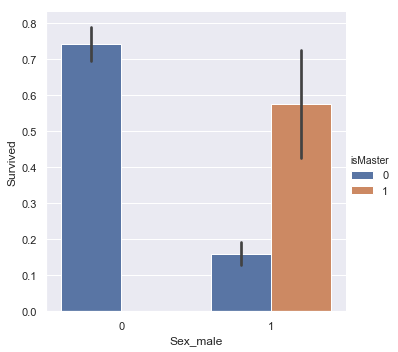

In [107]:
#BarPlot
tmp_data=frame_train
tmp_data['Survived']=data_train['Survived']
sns.catplot(x="Sex_male", y="Survived", hue="isMaster", kind="bar", data=tmp_data);
#see, all the master are survived!!

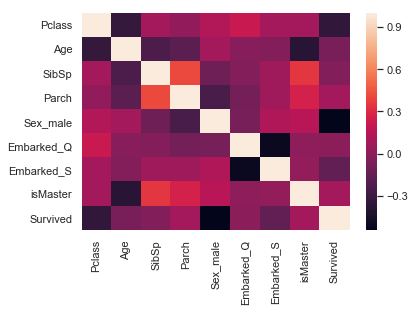

In [108]:
#heatMap
ax = sns.heatmap(frame_train.corr(), xticklabels=True, yticklabels=True)

In [109]:
#clf = svm.SVC(kernel='linear')
#dTree = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
dTree=RandomForestClassifier(n_estimators = 80).fit(X_train, y_train)
#dTree.fit(frame_train, data_train['Survived'])

In [110]:
#Predict Train
def Accuracy(Y,prediction):
    
    #Predict Test

    CM = pd.crosstab(Y, prediction)

    #let us save TP, TN, FP, FN
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]

    #check accuracy of model
    #accuracy_score(y_test, y_pred)*100
    print(((TP+TN)*100)/(TP+TN+FP+FN))
    
prediction = dTree.predict (X_train)
print('Accuracy of Train data:') #93
Accuracy(y_train,prediction)

predictionTest = dTree.predict (X_test)
print('Accuracy of Test data:')  #84
Accuracy(y_test,predictionTest)


#write to CSV  
predictionTestKagle = dTree.predict (frame_test)
data_test['Survived'] = predictionTestKagle
data_test[['PassengerId','Survived']].to_csv("output2.csv",sep=',', index=False)


Accuracy of Train data:
93
Accuracy of Test data:
80


## Accuracy Summary:
Decision Tree:
    
Accuracy of Train data:
93
Accuracy of Test data:
82

Random Forest:
Accuracy of Train data:

Accuracy of Test data:
